In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tensorflow-great-barrier-reef/example_sample_submission.csv
/kaggle/input/tensorflow-great-barrier-reef/example_test.npy
/kaggle/input/tensorflow-great-barrier-reef/train.csv
/kaggle/input/tensorflow-great-barrier-reef/test.csv
/kaggle/input/tensorflow-great-barrier-reef/greatbarrierreef/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/tensorflow-great-barrier-reef/greatbarrierreef/__init__.py
/kaggle/input/tensorflow-great-barrier-reef/train_images/video_1/6234.jpg
/kaggle/input/tensorflow-great-barrier-reef/train_images/video_1/1269.jpg
/kaggle/input/tensorflow-great-barrier-reef/train_images/video_1/3863.jpg
/kaggle/input/tensorflow-great-barrier-reef/train_images/video_1/6241.jpg
/kaggle/input/tensorflow-great-barrier-reef/train_images/video_1/10304.jpg
/kaggle/input/tensorflow-great-barrier-reef/train_images/video_1/623.jpg
/kaggle/input/tensorflow-great-barrier-reef/train_images/video_1/2193.jpg
/kaggle/input/tensorflow-great-barrier-reef/train_images/video

# 

# Importing libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image, ImageDraw
import random

# Data description

In [3]:
train = pd.read_csv('../input/tensorflow-great-barrier-reef/train.csv')
test = pd.read_csv('../input/tensorflow-great-barrier-reef/test.csv')
sample_submission = pd.read_csv('../input/tensorflow-great-barrier-reef/example_sample_submission.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23501 entries, 0 to 23500
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        23501 non-null  int64 
 1   sequence        23501 non-null  int64 
 2   video_frame     23501 non-null  int64 
 3   sequence_frame  23501 non-null  int64 
 4   image_id        23501 non-null  object
 5   annotations     23501 non-null  object
dtypes: int64(4), object(2)
memory usage: 1.1+ MB


In [5]:
train.head()

,video_id,sequence,video_frame,sequence_frame,image_id,annotations
0,0,40258,0,0,0-0,[]
1,0,40258,1,1,0-1,[]
2,0,40258,2,2,0-2,[]
3,0,40258,3,3,0-3,[]
4,0,40258,4,4,0-4,[]


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        3 non-null      int64 
 1   sequence        3 non-null      int64 
 2   video_frame     3 non-null      int64 
 3   sequence_frame  3 non-null      int64 
 4   image_id        3 non-null      object
dtypes: int64(4), object(1)
memory usage: 248.0+ bytes


In [7]:
test.head()

,video_id,sequence,video_frame,sequence_frame,image_id
0,3,17063,0,0,3-0
1,3,17063,1,1,3-1
2,3,17063,2,2,3-2


# Data visualization

In [8]:
df_train = train.copy()
train_dir = "../input/tensorflow-great-barrier-reef/train_images"
df_train['image_path'] = train_dir + "/video_" + df_train['video_id'].astype(str) + "/" + df_train['video_frame'].astype(str) + ".jpg"
df_train.head()

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,image_path
0,0,40258,0,0,0-0,[],../input/tensorflow-great-barrier-reef/train_i...
1,0,40258,1,1,0-1,[],../input/tensorflow-great-barrier-reef/train_i...
2,0,40258,2,2,0-2,[],../input/tensorflow-great-barrier-reef/train_i...
3,0,40258,3,3,0-3,[],../input/tensorflow-great-barrier-reef/train_i...
4,0,40258,4,4,0-4,[],../input/tensorflow-great-barrier-reef/train_i...


In [9]:
df_train['video_id'].value_counts()

2    8561
1    8232
0    6708
Name: video_id, dtype: int64

<BarContainer object of 3 artists>

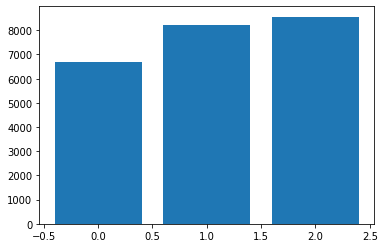

In [10]:
 plt.bar(x = df_train['video_id'].value_counts().index, height = df_train['video_id'].value_counts())

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23501 entries, 0 to 23500
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        23501 non-null  int64 
 1   sequence        23501 non-null  int64 
 2   video_frame     23501 non-null  int64 
 3   sequence_frame  23501 non-null  int64 
 4   image_id        23501 non-null  object
 5   annotations     23501 non-null  object
 6   image_path      23501 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.3+ MB


In [12]:
num_training_images = len(df_train)
num_training_images

23501

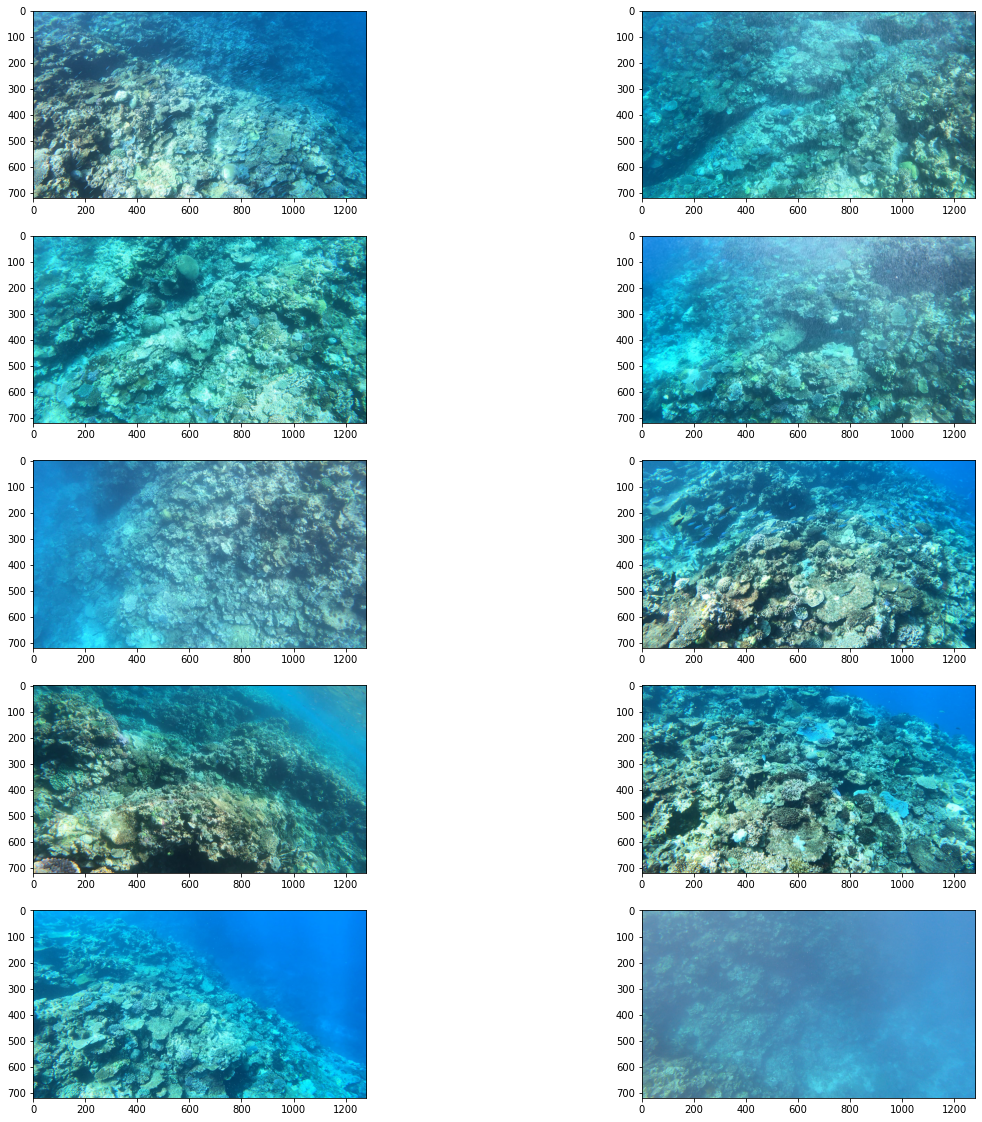

In [13]:
plt.figure(figsize = (20, 20))
for i in range(0, 10):
    plt.subplot(5, 2, i+1)
    index = random.randint(0, 23501)
    img_path = df_train['image_path'].iloc[index]
    img = Image.open(img_path)
    plt.imshow(img)

In [14]:
img_video_2_10 = plt.imread('../input/tensorflow-great-barrier-reef/train_images/video_2/10.jpg')
img_video_2_10.shape

(720, 1280, 3)

In [15]:
df_train_annotated = df_train[df_train['annotations'] != '[]']
df_train_annotated

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,image_path
16,0,40258,16,16,0-16,"[{'x': 559, 'y': 213, 'width': 50, 'height': 32}]",../input/tensorflow-great-barrier-reef/train_i...
17,0,40258,17,17,0-17,"[{'x': 558, 'y': 213, 'width': 50, 'height': 32}]",../input/tensorflow-great-barrier-reef/train_i...
18,0,40258,18,18,0-18,"[{'x': 557, 'y': 213, 'width': 50, 'height': 32}]",../input/tensorflow-great-barrier-reef/train_i...
19,0,40258,19,19,0-19,"[{'x': 556, 'y': 214, 'width': 50, 'height': 32}]",../input/tensorflow-great-barrier-reef/train_i...
20,0,40258,20,20,0-20,"[{'x': 555, 'y': 214, 'width': 50, 'height': 32}]",../input/tensorflow-great-barrier-reef/train_i...
...,...,...,...,...,...,...,...
23369,2,29859,10628,2856,2-10628,"[{'x': 92, 'y': 532, 'width': 40, 'height': 37}]",../input/tensorflow-great-barrier-reef/train_i...
23370,2,29859,10629,2857,2-10629,"[{'x': 78, 'y': 569, 'width': 40, 'height': 37}]",../input/tensorflow-great-barrier-reef/train_i...
23371,2,29859,10630,2858,2-10630,"[{'x': 65, 'y': 606, 'width': 41, 'height': 37}]",../input/tensorflow-great-barrier-reef/train_i...
23372,2,29859,10631,2859,2-10631,"[{'x': 51, 'y': 643, 'width': 44, 'height': 37}]",../input/tensorflow-great-barrier-reef/train_i...


In [16]:
(len(df_train_annotated)/ num_training_images) * 100

20.93102421173567

In [17]:
df_train['No_bbox'] = df_train['annotations'].apply(lambda x:x.count('{'))
df_train.head()

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,image_path,No_bbox
0,0,40258,0,0,0-0,[],../input/tensorflow-great-barrier-reef/train_i...,0
1,0,40258,1,1,0-1,[],../input/tensorflow-great-barrier-reef/train_i...,0
2,0,40258,2,2,0-2,[],../input/tensorflow-great-barrier-reef/train_i...,0
3,0,40258,3,3,0-3,[],../input/tensorflow-great-barrier-reef/train_i...,0
4,0,40258,4,4,0-4,[],../input/tensorflow-great-barrier-reef/train_i...,0


In [18]:
df_train['No_bbox'].value_counts()

0     18582
1      2801
2       942
3       374
4       240
5       134
7        61
6        59
8        58
11       44
15       40
9        32
16       28
10       26
14       22
13       19
17       19
12       17
18        3
Name: No_bbox, dtype: int64

<AxesSubplot:xlabel='No_bbox', ylabel='count'>

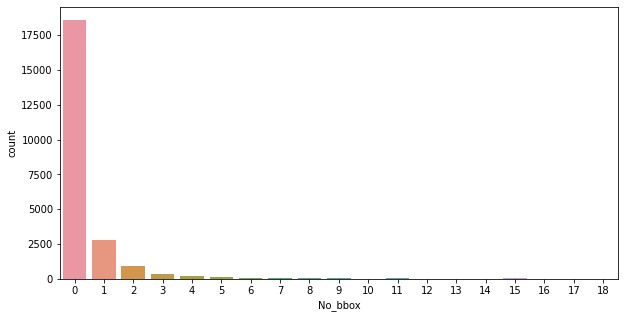

In [19]:
plt.figure(figsize = (10,5))
sns.countplot(x = df_train['No_bbox'])

In [20]:
df_train_annotated['No_bbox'] = df_train_annotated['annotations'].apply(lambda x:x.count('{'))
df_train_annotated.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,video_id,sequence,video_frame,sequence_frame,image_id,annotations,image_path,No_bbox
16,0,40258,16,16,0-16,"[{'x': 559, 'y': 213, 'width': 50, 'height': 32}]",../input/tensorflow-great-barrier-reef/train_i...,1
17,0,40258,17,17,0-17,"[{'x': 558, 'y': 213, 'width': 50, 'height': 32}]",../input/tensorflow-great-barrier-reef/train_i...,1
18,0,40258,18,18,0-18,"[{'x': 557, 'y': 213, 'width': 50, 'height': 32}]",../input/tensorflow-great-barrier-reef/train_i...,1
19,0,40258,19,19,0-19,"[{'x': 556, 'y': 214, 'width': 50, 'height': 32}]",../input/tensorflow-great-barrier-reef/train_i...,1
20,0,40258,20,20,0-20,"[{'x': 555, 'y': 214, 'width': 50, 'height': 32}]",../input/tensorflow-great-barrier-reef/train_i...,1


In [21]:
df_train_annotated[df_train_annotated['No_bbox'] >= 5]

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,image_path,No_bbox
5474,0,53708,9651,766,0-9651,"[{'x': 307, 'y': 570, 'width': 26, 'height': 2...",../input/tensorflow-great-barrier-reef/train_i...,5
5475,0,53708,9652,767,0-9652,"[{'x': 307, 'y': 575, 'width': 27, 'height': 2...",../input/tensorflow-great-barrier-reef/train_i...,5
5476,0,53708,9653,768,0-9653,"[{'x': 307, 'y': 581, 'width': 27, 'height': 3...",../input/tensorflow-great-barrier-reef/train_i...,5
5477,0,53708,9654,769,0-9654,"[{'x': 307, 'y': 586, 'width': 28, 'height': 3...",../input/tensorflow-great-barrier-reef/train_i...,5
5478,0,53708,9655,770,0-9655,"[{'x': 307, 'y': 590, 'width': 28, 'height': 3...",../input/tensorflow-great-barrier-reef/train_i...,5
...,...,...,...,...,...,...,...,...
19821,2,22643,5919,556,2-5919,"[{'x': 536, 'y': 600, 'width': 48, 'height': 5...",../input/tensorflow-great-barrier-reef/train_i...,5
19822,2,22643,5920,557,2-5920,"[{'x': 532, 'y': 608, 'width': 49, 'height': 5...",../input/tensorflow-great-barrier-reef/train_i...,5
19823,2,22643,5921,558,2-5921,"[{'x': 529, 'y': 615, 'width': 50, 'height': 5...",../input/tensorflow-great-barrier-reef/train_i...,5
19824,2,22643,5922,559,2-5922,"[{'x': 526, 'y': 622, 'width': 51, 'height': 5...",../input/tensorflow-great-barrier-reef/train_i...,5


In [22]:
df_train_annotated[df_train_annotated['No_bbox'] >= 8]

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,image_path,No_bbox
9288,1,8503,4136,308,1-4136,"[{'x': 1033, 'y': 279, 'width': 69, 'height': ...",../input/tensorflow-great-barrier-reef/train_i...,8
9289,1,8503,4137,309,1-4137,"[{'x': 1039, 'y': 279, 'width': 74, 'height': ...",../input/tensorflow-great-barrier-reef/train_i...,8
9290,1,8503,4138,310,1-4138,"[{'x': 1046, 'y': 280, 'width': 80, 'height': ...",../input/tensorflow-great-barrier-reef/train_i...,9
9291,1,8503,4139,311,1-4139,"[{'x': 1064, 'y': 274, 'width': 68, 'height': ...",../input/tensorflow-great-barrier-reef/train_i...,10
9292,1,8503,4140,312,1-4140,"[{'x': 1073, 'y': 274, 'width': 62, 'height': ...",../input/tensorflow-great-barrier-reef/train_i...,11
...,...,...,...,...,...,...,...,...
19730,2,22643,5828,465,2-5828,"[{'x': 968, 'y': 289, 'width': 67, 'height': 5...",../input/tensorflow-great-barrier-reef/train_i...,9
19731,2,22643,5829,466,2-5829,"[{'x': 976, 'y': 304, 'width': 62, 'height': 5...",../input/tensorflow-great-barrier-reef/train_i...,9
19732,2,22643,5830,467,2-5830,"[{'x': 984, 'y': 322, 'width': 64, 'height': 4...",../input/tensorflow-great-barrier-reef/train_i...,9
19733,2,22643,5831,468,2-5831,"[{'x': 992, 'y': 336, 'width': 65, 'height': 5...",../input/tensorflow-great-barrier-reef/train_i...,9
